## 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

## 데이터 (FinanceDataReader)

In [28]:
# 로우 데이터로 엑셀파일 로드
# 실행 전에 미리 구글 드라이브 마운트를 해야하고 동일 경로에서 엑셀파일을 읽어들여야 함
# raw_data = pd.read_excel('samsung_stock_dataset_finBERT_notnull.xlsx') # 삼성
raw_data = pd.read_excel('samsung_stock_dataset_finBERT_notnull.xlsx') # 현대

raw_data = raw_data.set_index("Date")
raw_data = raw_data.drop(['PSAR-up','PSAR-down'],axis=1)
print(raw_data.shape)
raw_data = raw_data.dropna(axis=0) # 널값 있는 행 제거
raw_data

(1234, 36)


,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,...,PSAR,RSI,ADX,OBV,OSCILLATOR,negative,neutral,positive,sentiment,next
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-22,42000,42650,42000,42450,5970796,0.008314,1.008314,0.990828,0.038202,0.082674,...,45051.520000,40.881416,18.101735,-13453907,-417.647059,0.030520,0.000077,0.969403,1,42400
2018-11-23,42450,42600,41900,42400,5192638,-0.001178,0.998822,0.996927,0.037061,0.079820,...,44921.459200,40.567862,17.555025,-18646545,-731.029412,0.101236,0.007946,0.890818,1,42600
2018-11-26,42150,42800,42100,42600,6613009,0.004717,1.004717,1.003951,0.028850,0.079954,...,44796.600832,42.468657,16.765372,-12033536,-944.852941,0.171952,0.015814,0.812233,1,43050
2018-11-27,42900,43100,42500,43050,8367091,0.010563,1.010563,1.004701,0.030665,0.080638,...,44676.736799,46.606462,15.616858,-3666445,-830.147059,0.046501,0.000300,0.953199,1,43150
2018-11-28,42800,43200,42750,43150,6943099,0.002323,1.002323,1.005868,0.030439,0.079615,...,44561.667327,47.509934,14.590579,3276654,-618.676471,0.762649,0.123316,0.114036,-1,43150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,66600,67000,66400,66700,14959443,-0.010386,0.989614,1.001076,0.033406,0.070579,...,68543.814928,47.724304,10.877366,640155380,-22.352941,0.000585,0.499241,0.500174,1,66800
2022-06-03,67200,67300,66800,66800,8222883,0.001499,1.001499,0.995561,0.032744,0.070580,...,68482.938629,48.344501,10.158162,648378263,148.529412,0.001084,0.998356,0.000561,0,65500
2022-06-07,66200,66400,65400,65500,19355755,-0.019461,0.980539,0.990551,0.035700,0.072899,...,68423.279857,41.458445,10.635226,629022508,47.941176,0.000039,0.000086,0.999876,1,65300


In [29]:
# if 'google.colab' in str(get_ipython()):
#     ! pip install git+https://github.com/ourownstory/neural_prophet.git 

# import FinanceDataReader as fdr

In [30]:
train_size = int(len(raw_data) * 0.67)

In [31]:
col_list = list(raw_data.columns)
col_list[raw_data.shape[1]-1] = 'y'
raw_data.columns = col_list

raw_data['ds'] = raw_data.index
raw_data.head()

stock = raw_data[:train_size]
test = raw_data[train_size:]

### prophet 객체 선언 및 학습

In [32]:
col_list

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Change',
 'Rn',
 'MRn',
 'Volatility10',
 'Volatility30',
 'Volatility60',
 'Volatility80',
 'Volatility120',
 'Volatility180',
 'Volatility360',
 'MA3',
 'MA10',
 'MA20',
 'MA60',
 'MA120',
 'MA180',
 'MA360',
 'ATR',
 'MACD-line',
 'MACD-hist',
 'MACD-sign',
 'PSAR',
 'RSI',
 'ADX',
 'OBV',
 'OSCILLATOR',
 'negative',
 'neutral',
 'positive',
 'sentiment',
 'y']

In [33]:
from neuralprophet import NeuralProphet, set_log_level

m10 = NeuralProphet()

m10 = m10.add_lagged_regressor(names=col_list[:-1], normalize="minmax") 
m = m10.fit(stock, validation_df=test)

INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.897% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.forecaster.__handle_missing_data) - 35 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 35 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 35 NaN values in column y were auto-imputed.
WARNING - (NP.forecaster.__handle_missing_data) - 35 missing values in column Open were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 35 NaN values in column Open were auto-imputed.
WARNING - (NP.forecaster.__handle_missing_data) - 35 missing values in column High were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 35 NaN values in column High were auto-

  0%|          | 0/121 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.01E-02, min: 1.58E+00


  0%|          | 0/121 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.01E-02, min: 1.58E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.31E-02
Epoch[228/228]: 100%|██████████| 228/228 [00:52<00:00,  4.32it/s, SmoothL1Loss=0.000411, MAE=1e+3, RMSE=1.28e+3, RegLoss=0, MAE_val=6.58e+3, RMSE_val=8.4e+3, SmoothL1Loss_val=0.0166]


In [34]:
m.tail()

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
223,0.000413,1006.663318,1297.759710,0.0,0.016497,6568.199219,8382.918945
224,0.000412,1007.016799,1287.294984,0.0,0.016524,6570.855957,8389.583984
225,0.000412,1006.189595,1278.704060,0.0,0.016541,6573.715332,8393.977539
226,0.000412,1005.728513,1290.572263,0.0,0.016588,6577.623535,8405.819336
227,0.000411,1004.973761,1279.204697,0.0,0.016580,6576.814941,8403.924805


In [35]:
print("SmoothL1Loss: ", m.SmoothL1Loss.tail(1).item())
print("RMSE(Train): ", m.RMSE.tail(1).item())
print("RMSE(Test): ", m.RMSE_val.tail(1).item())

SmoothL1Loss:  0.00041118722849281774
RMSE(Train):  1279.2046969264313
RMSE(Test):  8403.9248046875


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.767% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.771% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.forecaster.__handle_missing_data) - 52 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 52 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 52 NaN values in column y were auto-imputed.
WARNING - (NP.forecaster.__handle_missing_data) - 52 missing values in column Open were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 52 NaN values in column Open were auto-imputed.
WARNING - (NP.forecaster.__handle_missing_data) - 52 missing values in column High were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 52 NaN

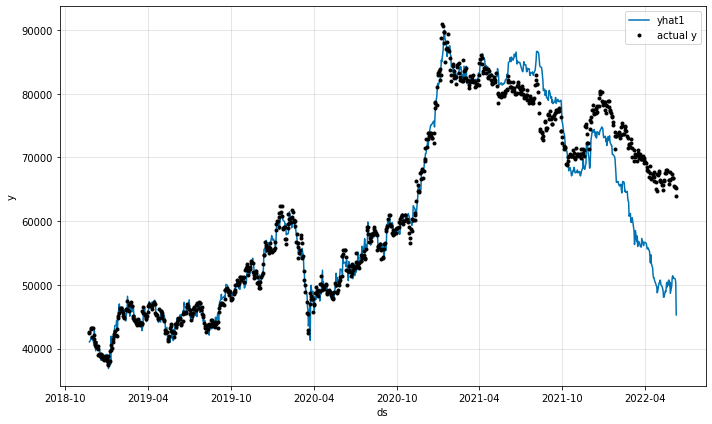

In [36]:
forecast = m10.predict(raw_data)
fig = m10.plot(forecast[['ds', 'y', 'yhat1']])

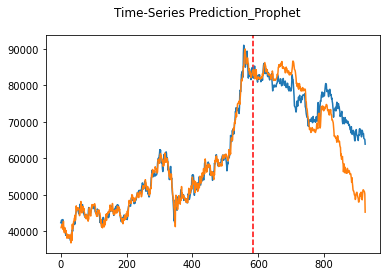

In [37]:
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(forecast[['y']])
plt.plot(forecast[['yhat1']])
plt.suptitle('Time-Series Prediction_Prophet')
plt.show()